Reading the Excel file Public.xlsx using the openpyxl engine.

In [ ]:
import pandas as pd

# Load the Excel file 
file_path = 'Public.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

df.info() → Showing column names, data types, non‑null counts, and memory usage.

Missing value check → Listing the top 20 columns with the most null values, sorted in descending order.

In [3]:
# Overview of columns, types, and null counts
print(df.info())

# Top columns with missing data
print(df.isnull().sum().sort_values(ascending=False).head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324232 entries, 0 to 324231
Columns: 101 entries, INDEX_NR to TRANSFER
dtypes: float64(18), int64(41), object(42)
memory usage: 249.8+ MB
None
NR_FATALITIES            324207
NR_INJURIES              323938
BIRD_BAND_NUMBER         323399
EFFECT_OTHER             321723
ENG_4_POS                320690
COST_OTHER_INFL_ADJ      318969
COST_OTHER               318969
COST_REPAIRS_INFL_ADJ    318926
COST_REPAIRS             318926
ENROUTE_STATE            318554
PRECIPITATION            312085
ENG_3_POS                310716
EFFECT                   309197
AOS                      308018
LOCATION                 283528
OTHER_SPECIFY            279770
SPEED                    222027
NUM_SEEN                 219362
FLT                      172749
SKY                      170235
dtype: int64


removes any columns where all values are missing, keeping only columns with at least one non‑null entry

In [4]:
# Drop columns with all values missing
df = df.dropna(axis=1, how='all')


In [6]:
print(df.columns)


Index(['INDEX_NR', 'INCIDENT_DATE', 'INCIDENT_MONTH', 'INCIDENT_YEAR', 'TIME',
       'TIME_OF_DAY', 'AIRPORT_ID', 'AIRPORT', 'AIRPORT_LATITUDE',
       'AIRPORT_LONGITUDE',
       ...
       'ENROUTE_STATE', 'NR_INJURIES', 'NR_FATALITIES', 'COMMENTS',
       'REPORTED_NAME', 'REPORTED_TITLE', 'SOURCE', 'PERSON', 'LUPDATE',
       'TRANSFER'],
      dtype='object', length=101)


NCIDENT_DATE → Converts to a datetime object, with invalid entries set to NaT (errors='coerce').

Cost columns (COST_REPAIRS, COST_OTHER, etc.) → Converts to numeric type, with invalid entries set to NaN.

This step ensures date fields are recognized as dates and cost fields are treated as numbers for analysis or modeling

In [7]:
# Convert date columns
df['INCIDENT_DATE'] = pd.to_datetime(df['INCIDENT_DATE'], errors='coerce')
# Convert cost fields to numeric
cost_columns = ['COST_REPAIRS', 'COST_OTHER', 'COST_REPAIRS_INFL_ADJ', 'COST_OTHER_INFL_ADJ']
for col in cost_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')



In [9]:
print(df.columns.tolist())


['INDEX_NR', 'INCIDENT_DATE', 'INCIDENT_MONTH', 'INCIDENT_YEAR', 'TIME', 'TIME_OF_DAY', 'AIRPORT_ID', 'AIRPORT', 'AIRPORT_LATITUDE', 'AIRPORT_LONGITUDE', 'RUNWAY', 'STATE', 'FAAREGION', 'LOCATION', 'OPID', 'OPERATOR', 'REG', 'FLT', 'AIRCRAFT', 'AMA', 'AMO', 'EMA', 'EMO', 'AC_CLASS', 'AC_MASS', 'TYPE_ENG', 'NUM_ENGS', 'ENG_1_POS', 'ENG_2_POS', 'ENG_3_POS', 'ENG_4_POS', 'PHASE_OF_FLIGHT', 'HEIGHT', 'SPEED', 'DISTANCE', 'SKY', 'PRECIPITATION', 'AOS', 'COST_REPAIRS', 'COST_OTHER', 'COST_REPAIRS_INFL_ADJ', 'COST_OTHER_INFL_ADJ', 'INGESTED_OTHER', 'INDICATED_DAMAGE', 'DAMAGE_LEVEL', 'STR_RAD', 'DAM_RAD', 'STR_WINDSHLD', 'DAM_WINDSHLD', 'STR_NOSE', 'DAM_NOSE', 'STR_ENG1', 'DAM_ENG1', 'ING_ENG1', 'STR_ENG2', 'DAM_ENG2', 'ING_ENG2', 'STR_ENG3', 'DAM_ENG3', 'ING_ENG3', 'STR_ENG4', 'DAM_ENG4', 'ING_ENG4', 'STR_PROP', 'DAM_PROP', 'STR_WING_ROT', 'DAM_WING_ROT', 'STR_FUSE', 'DAM_FUSE', 'STR_LG', 'DAM_LG', 'STR_TAIL', 'DAM_TAIL', 'STR_LGHTS', 'DAM_LGHTS', 'STR_OTHER', 'DAM_OTHER', 'OTHER_SPECIFY', '

Categorical columns (INDICATED_DAMAGE, SIZE, TYPE_ENG, STATE, PHASE_OF_FLIGHT) → Filling nulls with "Unknown".

Numeric columns (HEIGHT, SPEED, DISTANCE) → Filling nulls with 0

In [10]:
# Updated categorical columns 
categorical_cols = ['INDICATED_DAMAGE', 'SIZE', 'TYPE_ENG', 'STATE', 'PHASE_OF_FLIGHT']
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')

# Fill numeric columns with 0 
df['HEIGHT'] = df['HEIGHT'].fillna(0)
df['SPEED'] = df['SPEED'].fillna(0)
df['DISTANCE'] = df['DISTANCE'].fillna(0)



removes duplicate rows from the DataFrame

In [11]:
df = df.drop_duplicates()


INDICATED_DAMAGE → Converts all entries to uppercase, removes extra spaces, and replaces empty strings with "UNKNOWN".

SIZE → Converts all entries to title case (first letter capitalized), and replaces empty strings with "Unknown".

In [12]:
# Standardize INDICATED_DAMAGE column 
df['INDICATED_DAMAGE'] = df['INDICATED_DAMAGE'].astype(str).str.upper().str.strip().replace('', 'UNKNOWN')

# Standardize SIZE
df['SIZE'] = df['SIZE'].astype(str).str.title().replace('', 'Unknown')

In [21]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324232 entries, 0 to 324231
Data columns (total 95 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   INDEX_NR               324232 non-null  int64         
 1   INCIDENT_DATE          324232 non-null  datetime64[ns]
 2   INCIDENT_MONTH         324232 non-null  int64         
 3   INCIDENT_YEAR          324232 non-null  int64         
 4   TIME                   202390 non-null  object        
 5   TIME_OF_DAY            324232 non-null  object        
 6   AIRPORT_ID             324230 non-null  object        
 7   AIRPORT                324232 non-null  object        
 8   AIRPORT_LATITUDE       281842 non-null  object        
 9   AIRPORT_LONGITUDE      281839 non-null  object        
 10  RUNWAY                 244628 non-null  object        
 11  STATE                  324232 non-null  object        
 12  FAAREGION              281842 non-null  obje

displays the top 20 columns with the most missing values, sorted from highest to lowest

In [20]:
print(df.isnull().sum().sort_values(ascending=False).head(20))

COST_OTHER_INFL_ADJ      318969
COST_OTHER               318969
COST_REPAIRS_INFL_ADJ    318926
COST_REPAIRS             318926
ENROUTE_STATE            318554
EFFECT                   309197
AOS                      308018
LOCATION                 283528
OTHER_SPECIFY            279770
NUM_SEEN                 219362
FLT                      172749
REG                      126775
TIME                     121842
AMO                      121204
EMO                      117701
DAMAGE_LEVEL             114458
ENG_2_POS                108767
EMA                      108141
COMMENTS                 103142
AMA                       93685
dtype: int64


removes a specific list of columns (NR_FATALITIES, NR_INJURIES, BIRD_BAND_NUMBER, EFFECT_OTHER, ENG_3_POS, ENG_4_POS) from the DataFrame,  because they are  mostly empty, and not useful for analysis or modeling.

In [16]:
drop_cols = ['NR_FATALITIES', 'NR_INJURIES', 'BIRD_BAND_NUMBER', 'EFFECT_OTHER', 'ENG_3_POS', 'ENG_4_POS']
df = df.drop(columns=drop_cols)


This part is a missing value handling step that fills empty entries in the columns TIME_OF_DAY, SKY, and PRECIPITATION with the placeholder value "Unknown".

It ensures there are no null values in these categorical columns before modeling.

In [19]:
df['TIME_OF_DAY'] = df['TIME_OF_DAY'].fillna('Unknown')
df['SKY'] = df['SKY'].fillna('Unknown')
df['PRECIPITATION'] = df['PRECIPITATION'].fillna('Unknown')


Counts duplicate rows in the dataset.

Checks how many unique values each column has.

Shows summary statistics for numeric and categorical columns.

Lists the top columns with the most missing values.

In [26]:
# Check duplicates
print("Duplicates:", df.duplicated().sum())

# Unique values per column (zero-variance check)
print(df.nunique().sort_values())

# Summary stats for numerics
print(df.describe(include='number'))

# Summary stats for categoricals 
print(df.describe(include='object'))

# Check nulls again just to be safe
print(df.isnull().sum().sort_values(ascending=False).head(10))


Duplicates: 0
STR_WINDSHLD          2
ING_ENG3              2
DAM_ENG3              2
STR_ENG3              2
ING_ENG2              2
                  ...  
INCIDENT_DATE     12894
REG               45321
COMMENTS         207432
REMARKS          272303
INDEX_NR         324232
Length: 92, dtype: int64
           INDEX_NR  INCIDENT_MONTH  INCIDENT_YEAR            EMA  \
count  3.242320e+05   324232.000000  324232.000000  216091.000000   
mean   9.875570e+05        7.190305    2013.032616      19.453485   
std    3.517865e+05        2.785255       8.826987      10.611799   
min    6.082420e+05        1.000000    1990.000000       1.000000   
25%    7.005148e+05        5.000000    2007.000000      10.000000   
50%    7.911740e+05        8.000000    2015.000000      22.000000   
75%    1.345540e+06        9.000000    2020.000000      31.000000   
max    1.662400e+06       12.000000    2025.000000      47.000000   

                 EMO        AC_MASS       NUM_ENGS      ENG_1_POS  \
count 

Finds columns in the dataframe where all rows have the same single value.

Removes those columns, since they provide no useful information for modeling.

Prints how many such columns were dropped.

In [25]:
drop_single_val_cols = [col for col in df.columns if df[col].nunique() == 1]
df.drop(columns=drop_single_val_cols, inplace=True)
print(f"Dropped {len(drop_single_val_cols)} columns with a single unique value.")


Dropped 3 columns with a single unique value.


After Cleaning the data, we will save the cleaning version as "cleaned_birdstrike_data_V_3"

In [27]:
df.to_csv("cleaned_birdstrike_data_V_3.csv", index=False)

In [28]:
df.to_pickle("cleaned_birdstrike_data_V_3.pkl")

In the section we will visualize the different features

<AxesSubplot:title={'center':'Bird Strikes per Year'}, xlabel='INCIDENT_YEAR'>

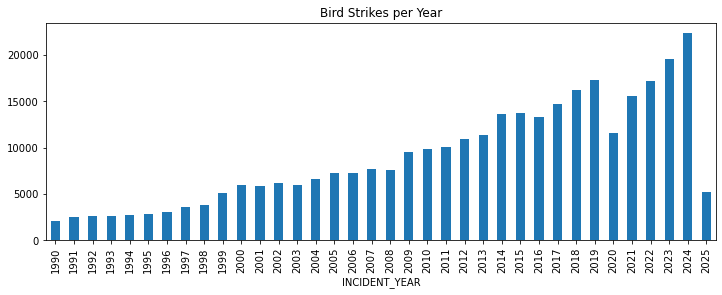

In [29]:
df['INCIDENT_YEAR'].value_counts().sort_index().plot(kind='bar', figsize=(12,4), title='Bird Strikes per Year')


<AxesSubplot:title={'center':'Top 10 Aircraft in Bird Strikes'}, xlabel='AIRCRAFT'>

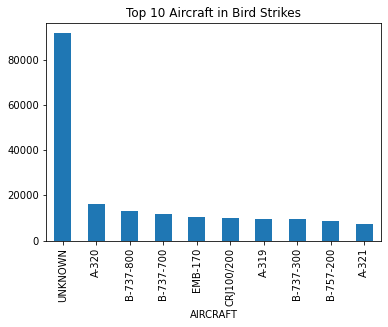

In [30]:
df['AIRCRAFT'].value_counts().head(10).plot(kind='bar', title='Top 10 Aircraft in Bird Strikes')


<AxesSubplot:title={'center':'Damage Level Distribution'}, ylabel='count'>

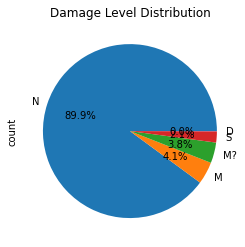

In [31]:
df['DAMAGE_LEVEL'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Damage Level Distribution')


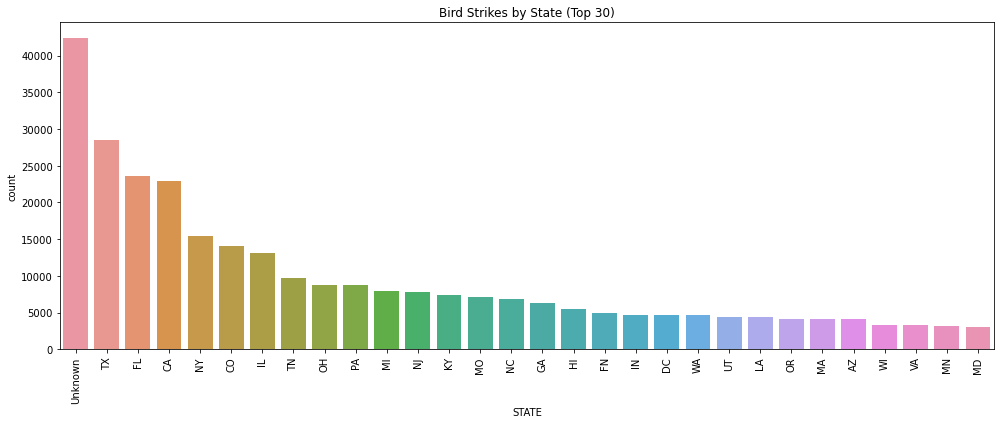

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='STATE', order=df['STATE'].value_counts().index[:30])
plt.title("Bird Strikes by State (Top 30)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


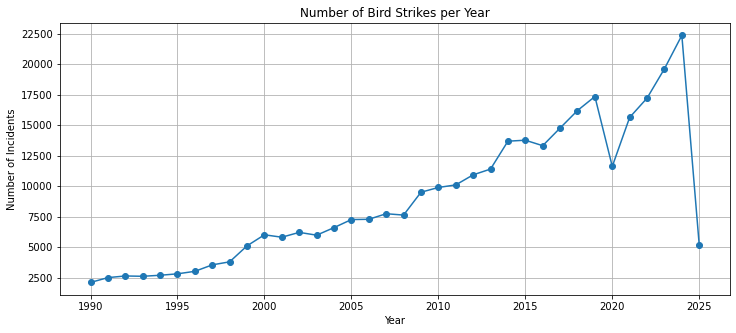

In [33]:
plt.figure(figsize=(12, 5))
df['INCIDENT_YEAR'].value_counts().sort_index().plot(marker='o')
plt.title('Number of Bird Strikes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()


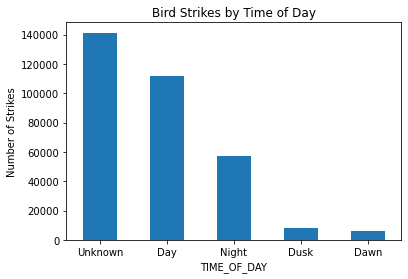

In [34]:
df['TIME_OF_DAY'].value_counts().plot(kind='bar', title='Bird Strikes by Time of Day')
plt.ylabel('Number of Strikes')
plt.xticks(rotation=0)
plt.show()


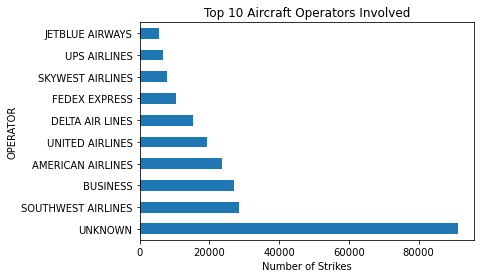

In [35]:
df['OPERATOR'].value_counts().head(10).plot(kind='barh', title='Top 10 Aircraft Operators Involved')
plt.xlabel('Number of Strikes')
plt.show()


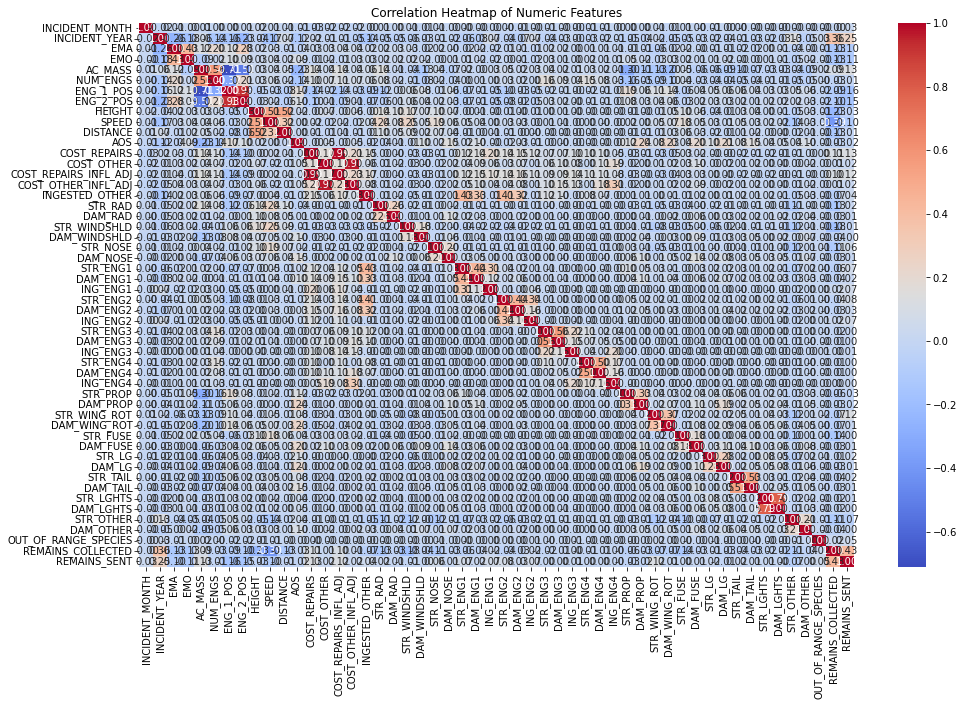

In [36]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['INDEX_NR'])  # drop index

plt.figure(figsize=(16, 10))
sns.heatmap(numeric_cols.corr().round(2), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [39]:
import pandas as pd
import folium

# Drop missing coordinates
map_df = df[['AIRPORT', 'AIRPORT_LATITUDE', 'AIRPORT_LONGITUDE']].dropna()

# Count strikes per airport
airport_counts = map_df.groupby(['AIRPORT', 'AIRPORT_LATITUDE', 'AIRPORT_LONGITUDE']).size().reset_index(name='count')

# Sort to top 50 busiest strike locations
top_airports = airport_counts.sort_values('count', ascending=False).head(50)


In [40]:
# Start map centered on USA
birdstrike_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4, tiles='CartoDB positron')

# Add each top airport as a marker
for _, row in top_airports.iterrows():
    folium.CircleMarker(
        location=[row['AIRPORT_LATITUDE'], row['AIRPORT_LONGITUDE']],
        radius=row['count'] / 200,  # adjust scaling
        popup=f"{row['AIRPORT']} ({int(row['count'])} strikes)",
        color='crimson',
        fill=True,
        fill_opacity=0.7
    ).add_to(birdstrike_map)

# Save to HTML
birdstrike_map.save('bird_strike_airport_map.html')


The results of airport map is saved as "bird_strike_airport_map.html"

Now, we want to check the features that are most corrolated with the damage 

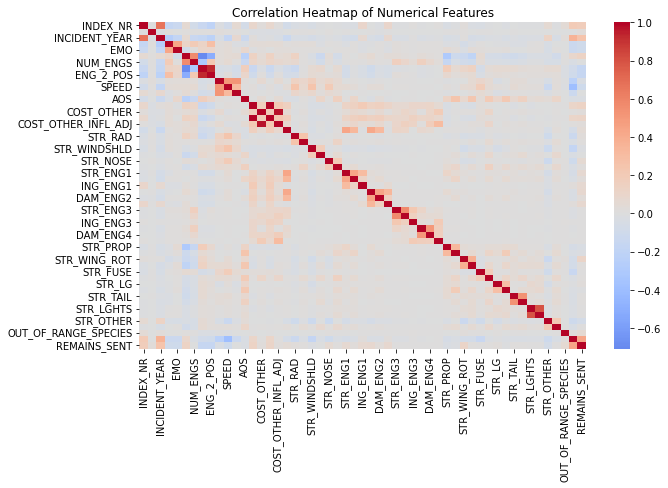

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


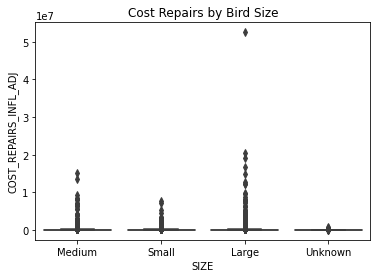

In [45]:
sns.boxplot(x='SIZE', y='COST_REPAIRS_INFL_ADJ', data=df)
plt.title("Cost Repairs by Bird Size")
plt.show()


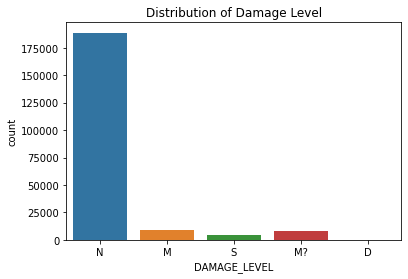

In [46]:
sns.countplot(x='DAMAGE_LEVEL', data=df)
plt.title("Distribution of Damage Level")
plt.show()


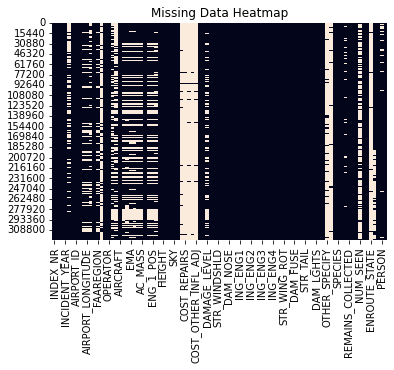

In [47]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()


If there is damage we will set it as 1 and if no damage we will set it as 0

This section of code prepares the dataset for training a Random Forest classifier by performing feature selection, data splitting, and data preprocessing using pipelines.
train_test_split → Splits the dataset into training and test sets.

OneHotEncoder → Encodes categorical variables into binary vectors.

SimpleImputer → Handles missing values (e.g., replacing with median or most frequent value).

ColumnTransformer → Applies different preprocessing steps to numeric and categorical columns.

Pipeline → Chains preprocessing steps together for cleaner, reusable code.

RandomForestClassifier → Machine learning model for classification.

classification_report, confusion_matrix → Evaluate model performance.
ransforms the original DAMAGE_LEVEL column into a binary target variable:

0 → No damage ('N')

1 → Any type of damage (all other values)

X → Input features used for training.

y → Target variable (HAS_DAMAGE).

The chosen features include:

Numerical: e.g., SPEED, HEIGHT

Categorical: e.g., TIME_OF_DAY, STATE, TYPE_ENG

stratify=y → Keeps the same proportion of target classes in both train and test sets.

random_state=42 → Ensures reproducibility.
num_cols → List of numeric columns for numeric preprocessing.

cat_cols → List of categorical columns for categorical preprocessing.
Handles missing numeric values by replacing them with the median.

Handles missing categorical values by replacing them with the most frequent category.

Converts categorical features into one-hot encoded vectors.
Numeric preprocessing to numeric columns.

Categorical preprocessing to categorical columns.

Ensures the data is transformed in a single step before feeding into the model



In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Target
df['HAS_DAMAGE'] = df['DAMAGE_LEVEL'].apply(lambda x: 0 if x == 'N' else 1)

# Selected features
features = ['INCIDENT_YEAR', 'TIME_OF_DAY', 'PHASE_OF_FLIGHT', 'STATE', 'SKY',
            'PRECIPITATION', 'NUM_ENGS', 'TYPE_ENG', 'AC_MASS', 'SPEED',
            'HEIGHT', 'DISTANCE', 'SIZE', 'AOS']

X = df[features]
y = df['HAS_DAMAGE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Columns by type
num_cols = X.select_dtypes(include='number').columns.tolist()
cat_cols = X.select_dtypes(exclude='number').columns.tolist()

# Pipelines
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column transformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])


This section builds the end-to-end machine learning pipeline, trains the model, and prepares it for evaluation.
preprocess 

Applies the ColumnTransformer defined earlier:

Numeric pipeline: median imputation.

Categorical pipeline: most frequent imputation + one-hot encoding.

Ensures all features are cleaned and transformed before modeling.

classifier

Uses a RandomForestClassifier:

n_estimators=100 → Builds 100 decision trees and aggregates their predictions.

class_weight='balanced' → Adjusts weights to handle class imbalance by giving more weight to underrepresented classes.

random_state=42 → Ensures reproducibility.
Fits the pipeline on the training data:

Step 1: Applies preprocessing to X_train.

Step 2: Trains the Random Forest classifier on the transformed features.

Since the pipeline integrates preprocessing and modeling:

You can directly call model.predict() on raw data without manually preprocessing it first.

This ensures a clean and production-ready workflow.

In [ ]:
# Full pipeline
model = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))
])

# Train
model.fit(X_train, y_train)


Generate Predictions

python
Copy
Edit
y_pred = model.predict(X_test)
The pipeline automatically:

Applies the same preprocessing steps used in training.

Uses the trained Random Forest classifier to predict the HAS_DAMAGE class for each record in the test set.

Classification Report

python
Copy
Edit
print(classification_report(y_test, y_pred))
Displays key metrics for binary classification:

Precision → Out of all predicted positives, how many were correct?

Recall → Out of all actual positives, how many were correctly identified?

F1-score → Harmonic mean of precision and recall (balances the two).

Support → Number of occurrences of each class in the test set.

Accuracy → Overall percentage of correct predictions.

Confusion Matrix




In [54]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.94      0.89     47154
           1       0.90      0.78      0.83     33904

    accuracy                           0.87     81058
   macro avg       0.88      0.86      0.86     81058
weighted avg       0.87      0.87      0.87     81058

[[44138  3016]
 [ 7596 26308]]


feature importance visualization code

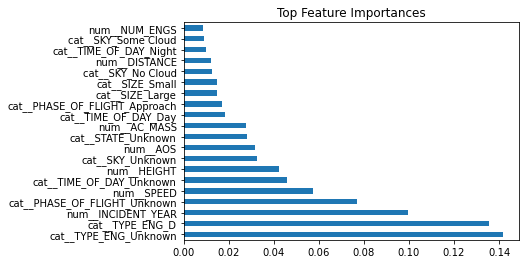

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

importances = model.named_steps['classifier'].feature_importances_
feature_names = model.named_steps['preprocess'].get_feature_names_out()
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

feat_imp.head(20).plot(kind='barh')
plt.title("Top Feature Importances")
plt.show()


In [56]:
import joblib
joblib.dump(model, 'rf_damage_predictor.pkl')


['rf_damage_predictor.pkl']